# ASSUMPTIONS OF LINEAR REGREESSION :-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
x = df.iloc[:,0:3].values
x

array([[-5.70562824e-01,  1.42034231e+00,  4.95580395e-01],
       [-9.90562704e-01,  5.56964528e-01,  1.04506399e+00],
       [-6.74727510e-01,  1.50616865e-01,  1.77464503e+00],
       [ 3.88250414e-01, -3.87127181e-01, -1.10229155e-01],
       [ 1.16788229e+00, -2.41044701e-02,  1.45063214e-01],
       [-8.89888979e-01, -1.58094538e+00, -4.22792727e-01],
       [-2.68510868e+00,  1.84207947e-02,  1.72266920e+00],
       [ 6.63187770e-01,  1.85267835e-01, -1.88342383e+00],
       [ 3.19196176e-01, -2.98397020e+00, -1.51521566e+00],
       [-3.48368316e-01, -1.81101917e+00,  7.46891531e-01],
       [-6.37134863e-01, -5.39574612e-01, -4.08345242e-01],
       [ 1.11594518e+00, -3.03033672e-02, -3.19590141e-01],
       [-6.89599657e-01, -3.57440729e-01, -5.41503716e-01],
       [ 2.07087853e+00,  1.06979836e+00,  5.93588115e-01],
       [-7.12849796e-01, -1.50891712e+00, -2.52815988e-01],
       [ 8.87925723e-01, -8.23886105e-01,  4.36232115e-01],
       [-2.94033248e-01, -6.87859510e-01

In [5]:
y = df.iloc[:,-1].values
y

array([  -9.76318213,  -24.02935493,   45.61642069,   34.13573658,
         86.66364674,  -77.89735638,  -75.23160582,  -57.49271113,
        -54.17628622,   29.46983531,  -87.07697894,   61.49707765,
        -87.1908553 ,  189.52586717, -105.60940906,   72.93452847,
         33.37559704, -108.0026368 , -127.03270151,  -97.32244317,
        -56.51293004,  -61.6929032 ,  -46.54502761,  -55.46277415,
         98.27590634,   53.88321804,  -69.66191612,  143.07902342,
       -114.61997528,   31.85127955,  -44.39024034,    1.48968394,
        -88.71622065,   87.12681822,  -17.28585002,  150.20169579,
        -71.41503479, -139.82571896,  190.13399327,  126.78997841,
        191.14039956,  -15.88018358,   79.0476178 ,   32.44367679,
         43.23159853,  -34.70291861,  -94.49899703,   92.90733739,
        -49.79965934, -257.06342658,  -28.33835823,   52.78981793,
       -114.24973574,   31.88367296,   80.14978081,   85.36236114,
        -95.10607425,  -42.28614302,   -2.46076531,  215.04675

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

# 1. LINEAR RELATIONSHIP

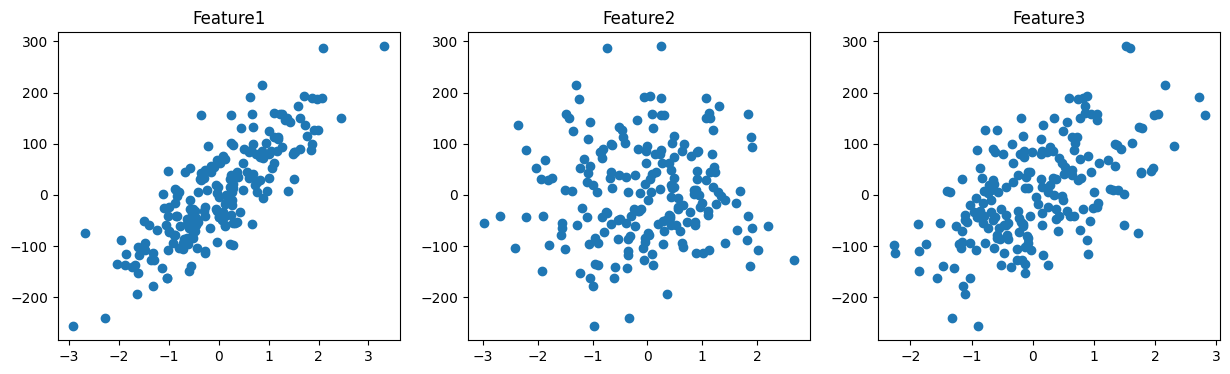

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 4))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

# 2. MULTICOLLINEARITY

In [24]:
df.iloc[:,0:3].corr()
# finding correlation values of feature matrix using pandas 'corr()' function

,feature1,feature2,feature3
feature1,1.000000,-0.001055,0.049286
feature2,-0.001055,1.000000,0.060387
feature3,0.049286,0.060387,1.000000


<Axes: >

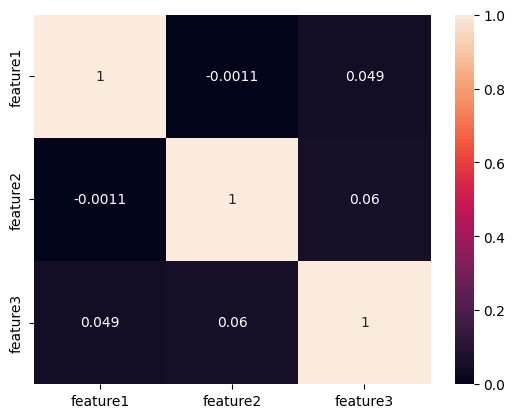

In [25]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)
# tending to 1 refer more towards correlation.

# 3. NORMALITY OF RESIDUAL

In [28]:
# Residual
y_pred = lr.predict(x_test)
residual = y_test - y_pred

# actual - predicted = residual

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


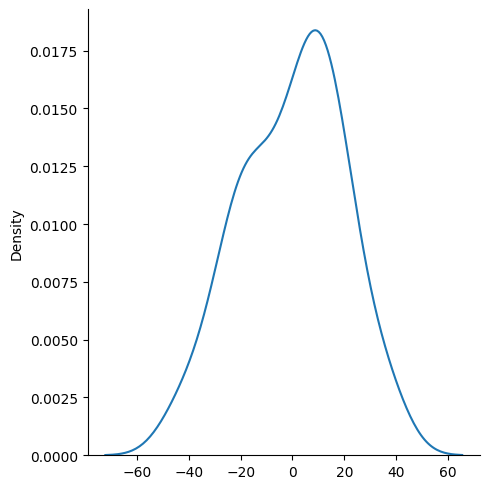

In [29]:
sns.displot(residual,kind='kde')

# plot of error(residual) is kind like Normally Distributed.
# Very much point touches best_line_of_fit.

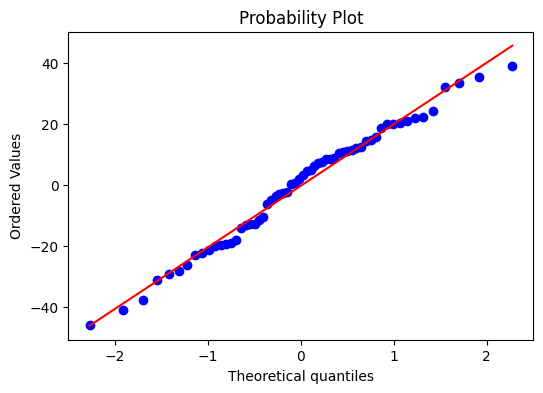

In [30]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

# 4. HOMOSESCADACITY

![](homosescadacity.webp)

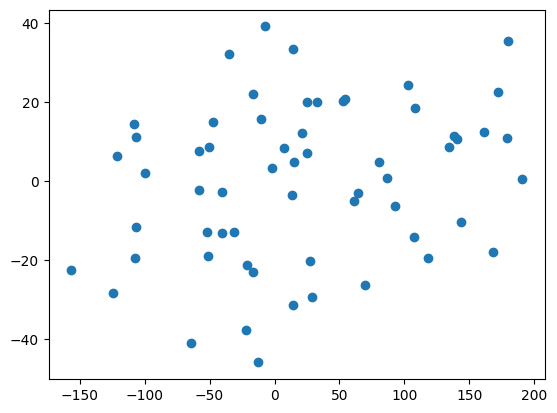

In [31]:
plt.scatter(y_pred,residual)

# 5. AUTO-CORRELATION OF RESIDUALS

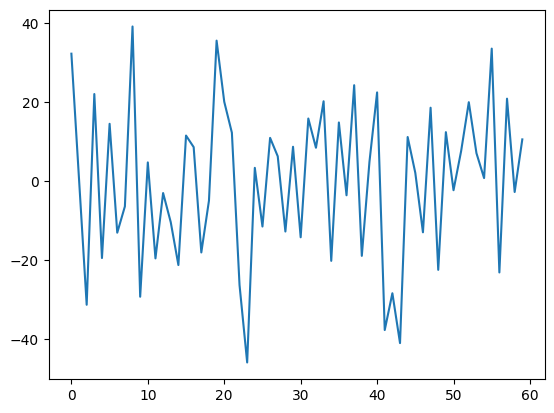

In [33]:
plt.plot(residual)